# **Importing Libraries And Datasets**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv("/content/heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.shape

(1025, 14)

In [21]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Training A Decision Tree Classifier**

In [22]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 717
Testing Set Size: 308


In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree (Unconstrained) Training Accuracy: {train_acc_dt:.5f}")
print(f"Decision Tree (Unconstrained) Testing Accuracy: {test_acc_dt:.5f}")

Decision Tree (Unconstrained) Training Accuracy: 1.00000
Decision Tree (Unconstrained) Testing Accuracy: 0.97078


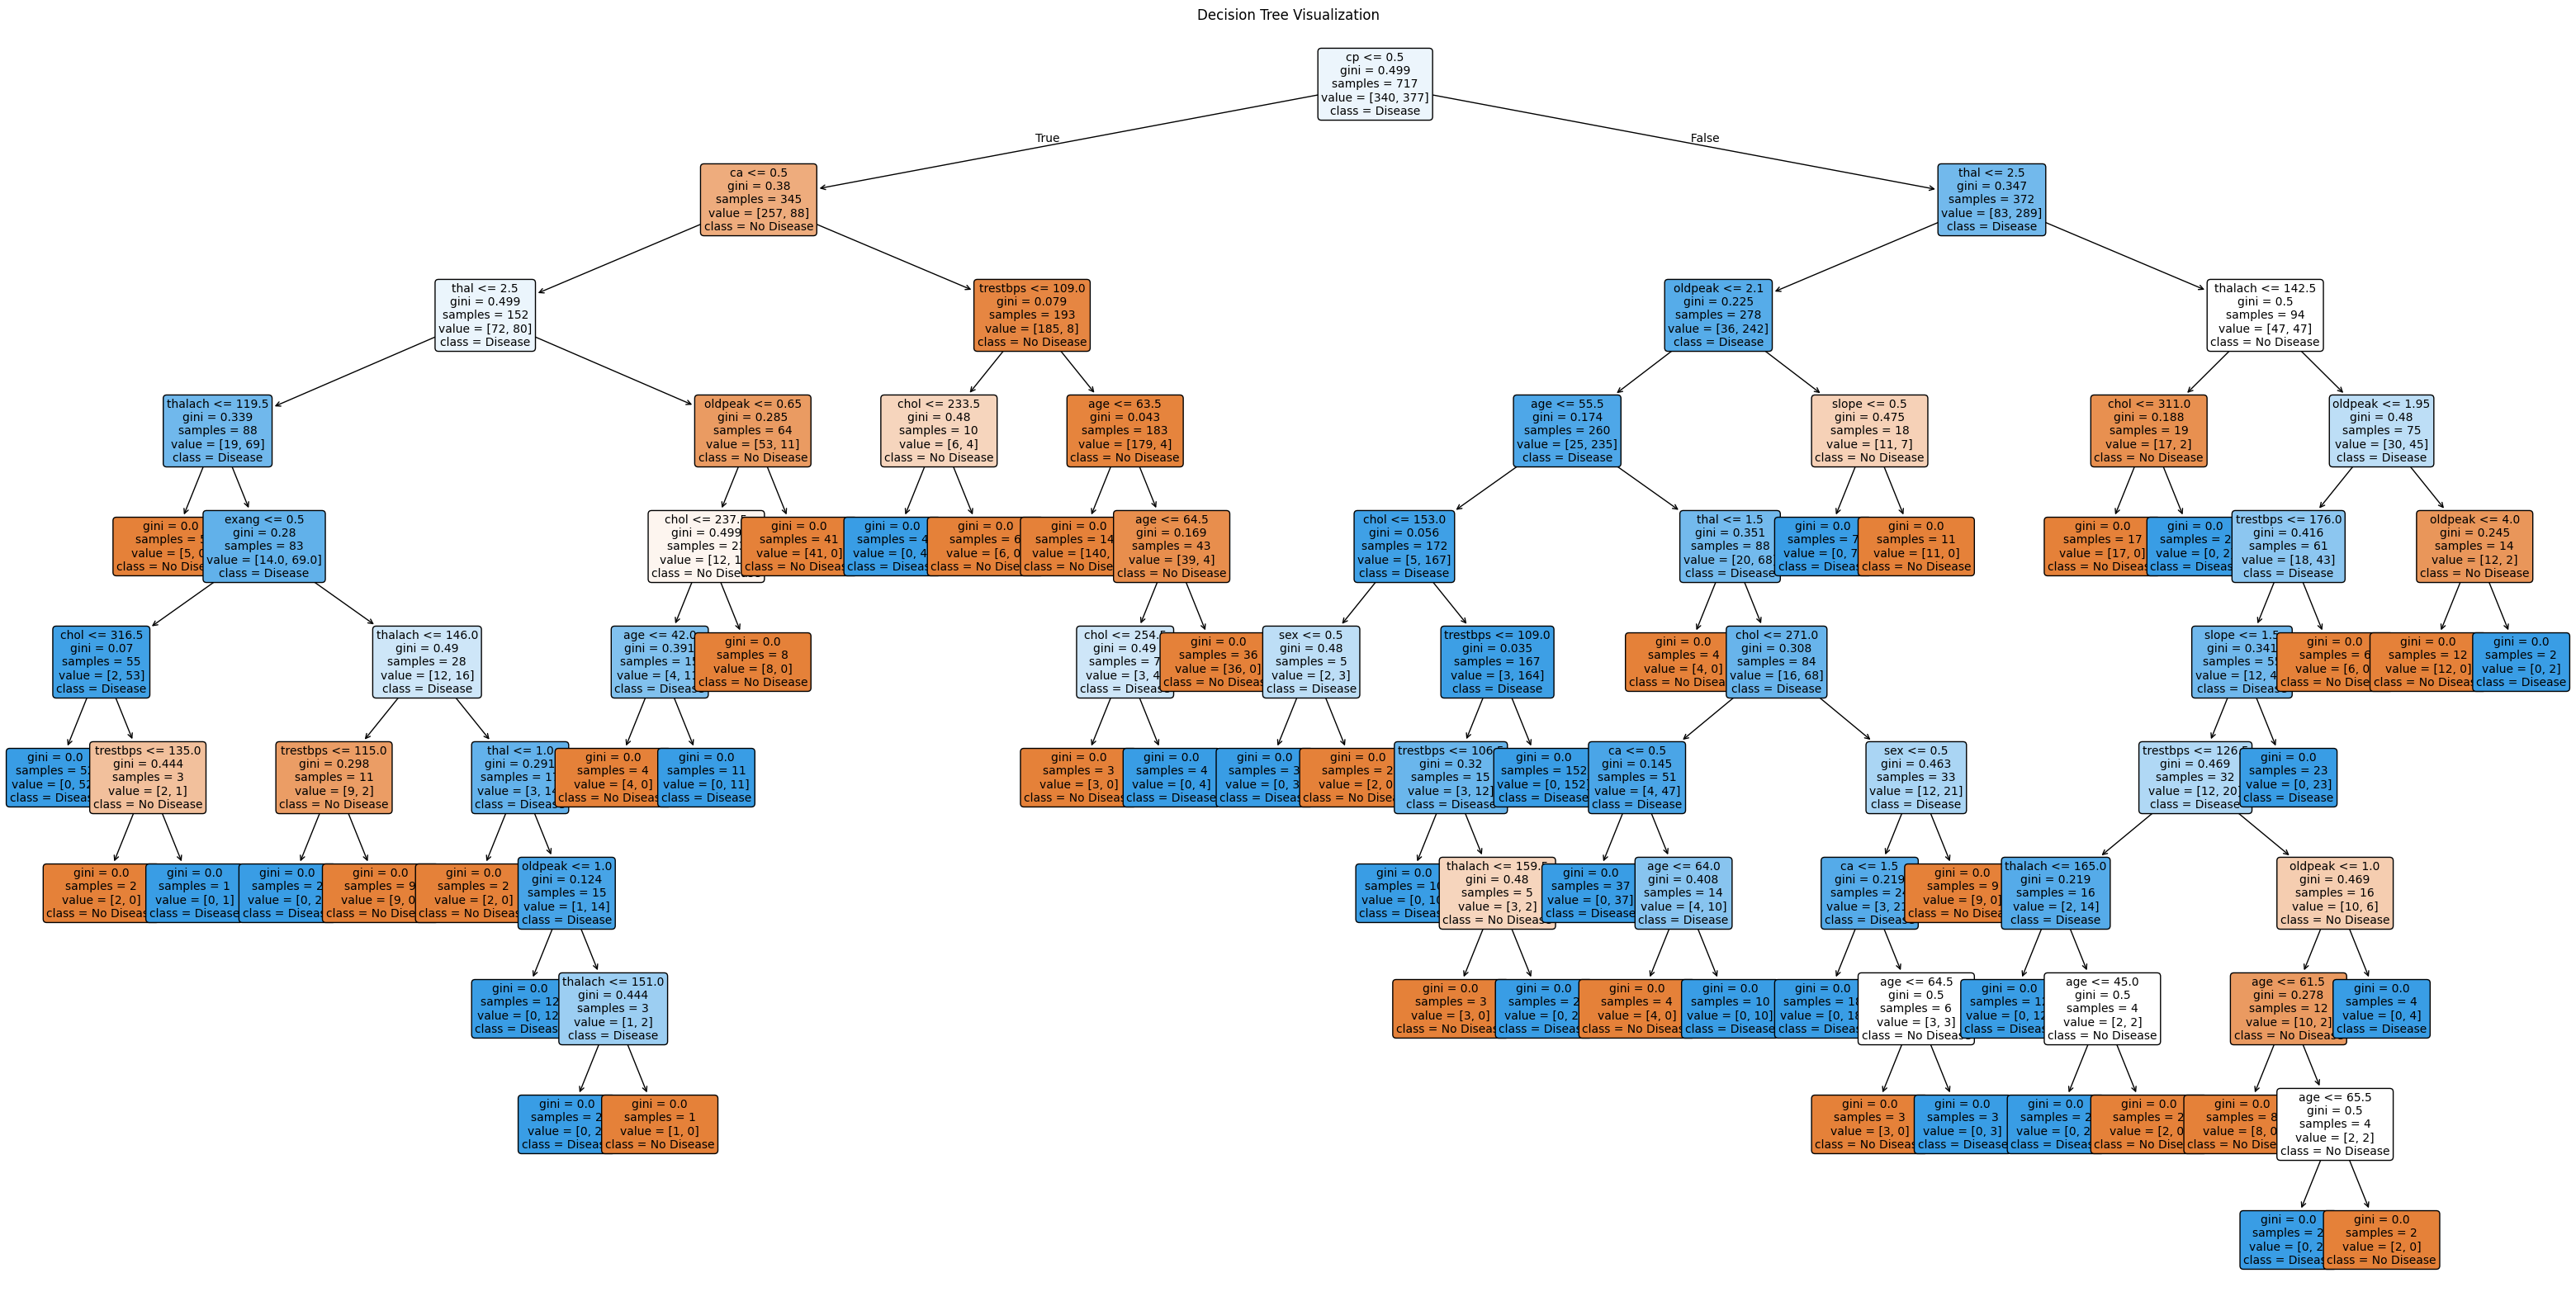

In [26]:
plt.figure(figsize=(40, 20))
plot_tree(
    dt,
    feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# **Controlling Tree Depth**

In [27]:
dt_pruned = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)

y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"Decision Tree (Pruned) Training Accuracy: {train_acc_pruned:.5f}")
print(f"Decision Tree (Pruned) Testing Accuracy: {test_acc_pruned:.5f}")

Decision Tree (Pruned) Training Accuracy: 0.89679
Decision Tree (Pruned) Testing Accuracy: 0.83442


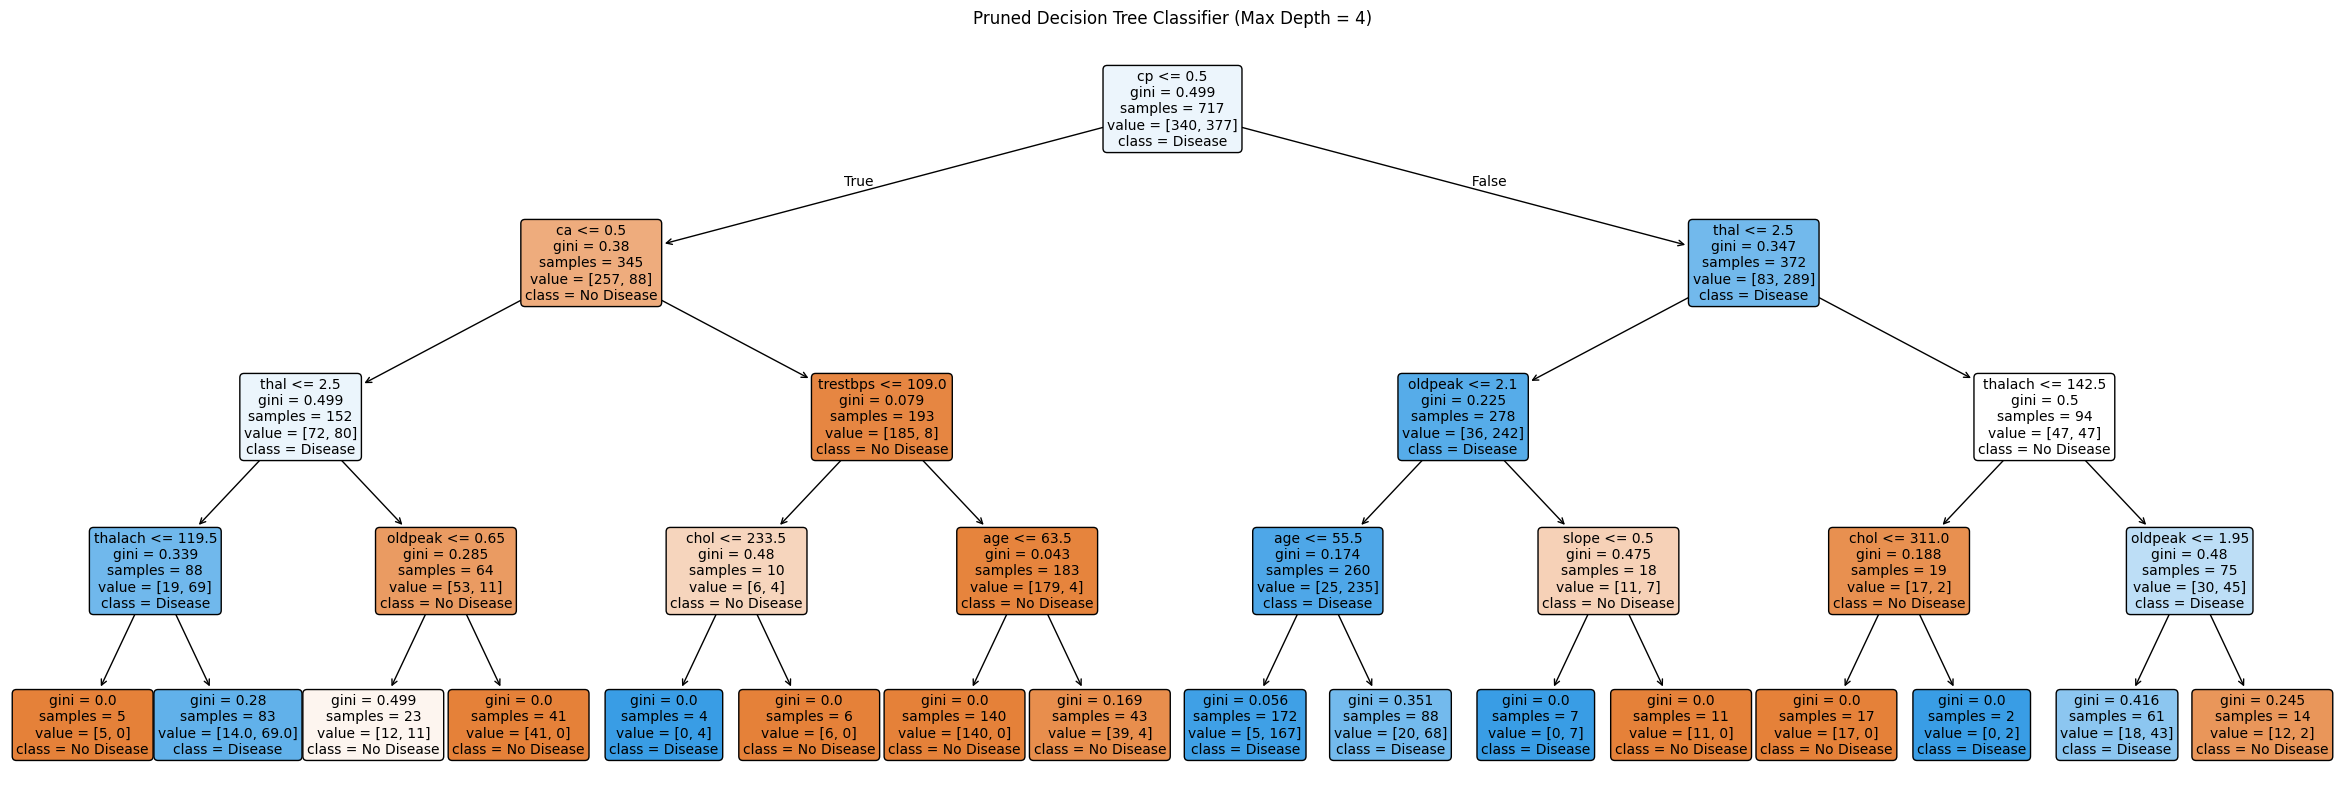

In [28]:
plt.figure(figsize=(30, 10))
plot_tree(
    dt_pruned,
    feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree Classifier (Max Depth = 4)")
plt.show()

# **Training A Random Forest**

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
rf_classifier.fit(X_train, y_train)

y_train_pred_rf = rf_classifier.predict(X_train)
y_test_pred_rf = rf_classifier.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_acc_rf:.5f}")
print(f"Random Forest Testing Accuracy: {test_acc_rf:.5f}")

Random Forest Training Accuracy: 0.93305
Random Forest Testing Accuracy: 0.88636


# **Interpreting Feature Importances**

Feature Importances In Random Forest:
cp          0.179715
thal        0.168812
oldpeak     0.137887
ca          0.134040
thalach     0.112034
exang       0.060258
slope       0.057825
age         0.052019
trestbps    0.033680
chol        0.027935
sex         0.025397
restecg     0.006950
fbs         0.003448
dtype: float64


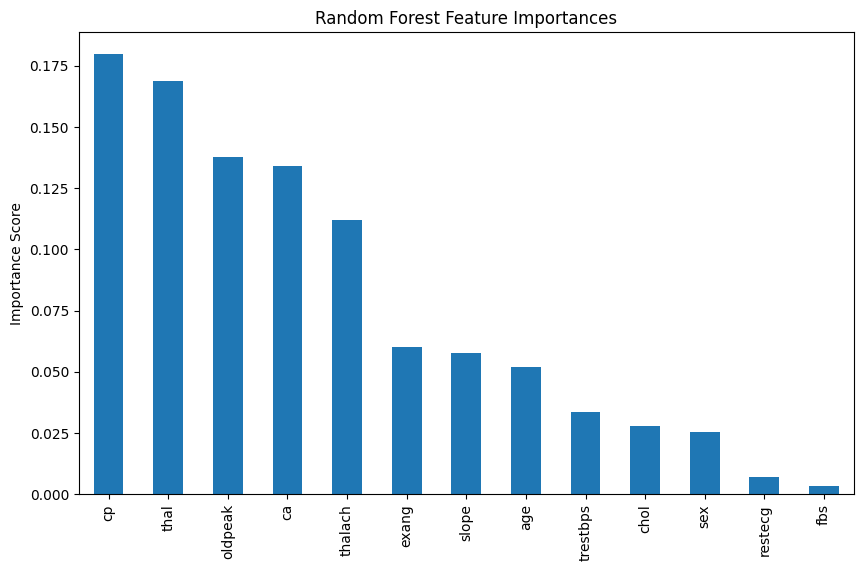

In [30]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
sorted_features = feature_importances.sort_values(ascending=False)

print("Feature Importances In Random Forest:")
print(sorted_features.head(20))

plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.show()

# **Cross Validation**

In [31]:
cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5, scoring='accuracy')

cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

print(f"Decision Tree CV Scores: {cv_scores_dt}")
print(f"Decision Tree Mean CV Accuracy: {cv_scores_dt.mean():.5f}")
print(f"Random Forest CV Scores: {cv_scores_rf}")
print(f"Random Forest Mean CV Accuracy: {cv_scores_rf.mean():.5f}")

Decision Tree CV Scores: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Decision Tree Mean CV Accuracy: 0.83415
Random Forest CV Scores: [0.93658537 0.87804878 0.92682927 0.87317073 0.85853659]
Random Forest Mean CV Accuracy: 0.89463
